In [15]:
import pandas as pd

In [16]:
df=pd.read_csv('C:\\Users\\Lenovo\\OneDrive\\Desktop\\mcdonalds.csv')

In [17]:
df.columns

Index(['ppppppp', 'convenient', 'spicy', 'fattening', 'greasy', 'fast',
       'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17'],
      dtype='object')

In [18]:
df.shape

(1453, 18)

In [19]:
df.head(3)

,ppppppp,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female,NaN,NaN,NaN
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female,NaN,NaN,NaN
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female,NaN,NaN,NaN


In [127]:
#PCA

In [20]:
MD_x = df.iloc[:, :11].values
MD_x = (MD_x == "Yes").astype(int)
col_means = np.round(MD_x.mean(axis=0), 2)

print(col_means)

[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


In [21]:
from sklearn.decomposition import PCA

pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Creating a DataFrame to summarize the PCA results
explained_variance = pca.explained_variance_ratio_
components = pca.components_

# Summary
summary_df = pd.DataFrame({
    'Explained Variance Ratio': explained_variance,
    'Principal Components': components.tolist()
})

print(summary_df)

    Explained Variance Ratio  \
0                   0.299447   
1                   0.192797   
2                   0.133045   
3                   0.083096   
4                   0.059481   
5                   0.050300   
6                   0.043849   
7                   0.039548   
8                   0.036761   
9                   0.032353   
10                  0.029323   

                                 Principal Components  
0   [-0.4769334897676294, -0.15533158990004972, -0...  
1   [0.3637897834887727, 0.01641399734158308, 0.01...  
2   [-0.3044440223936475, -0.06251529790317784, -0...  
3   [0.05516219745767794, -0.1424249647646842, 0.1...  
4   [-0.30753507430828747, 0.27760804637108866, 0....  
5   [0.17073819091700282, -0.34783005572345604, -0...  
6   [-0.280518627839267, -0.059737925754767794, 0....  
7   [0.013041168014303809, -0.11307868324720663, 0...  
8   [0.572402777042118, -0.018465340417020856, 0.4...  
9   [-0.11028436834305903, -0.6658175559010426, -0...  

In [22]:
from sklearn.decomposition import PCA

pca = PCA()
MD_pca = pca.fit(MD_x)

# Extracting standard deviations (square roots of the eigenvalues)
standard_deviations = pca.singular_values_

# Printing the standard deviations with 1 decimal place
print("Standard deviations (1, .., p={}):".format(MD_x.shape[1]))
print(np.round(standard_deviations, 1))

Standard deviations (1, .., p=11):
[28.8 23.1 19.2 15.2 12.9 11.8 11.  10.5 10.1  9.5  9. ]


In [23]:
pca = PCA()
MD_pca = pca.fit(MD_x)

# Extracting the rotation matrix (principal components)
rotation_matrix = pca.components_

# Printing the rotation matrix
print("Rotation (n x k) = ({} x {}):".format(rotation_matrix.shape[0], rotation_matrix.shape[1]))
print(rotation_matrix)

Rotation (n x k) = (11 x 11):
[[-0.47693349 -0.15533159 -0.00635636  0.11623168  0.3044427  -0.10849325
  -0.33718593 -0.47151394  0.32904173 -0.21371062  0.37475293]
 [ 0.36378978  0.016414    0.01880869 -0.03409395 -0.06383884 -0.0869722
  -0.61063276  0.3073178   0.60128596  0.07659344 -0.13965633]
 [-0.30444402 -0.0625153  -0.03701866 -0.32235949 -0.80237317 -0.06464172
  -0.14931026 -0.28726479  0.02439661  0.19205128 -0.08857138]
 [ 0.0551622  -0.14242496  0.19761927 -0.35413876  0.2539601  -0.09736269
   0.11895823 -0.00254696  0.06781599  0.76348804  0.36953871]
 [-0.30753507  0.27760805  0.07062017 -0.07340475  0.36139895  0.10793025
  -0.12897259 -0.21089912 -0.00312457  0.28784553 -0.72920859]
 [ 0.17073819 -0.34783006 -0.3550866  -0.40651542  0.20934711 -0.59463206
  -0.10324067 -0.07691443 -0.26134151 -0.17822612 -0.21087805]
 [-0.28051863 -0.05973793  0.70763705 -0.38594277  0.03616962 -0.08684577
  -0.04044934  0.36045348 -0.06838452 -0.34961569 -0.02679159]
 [ 0.0130411

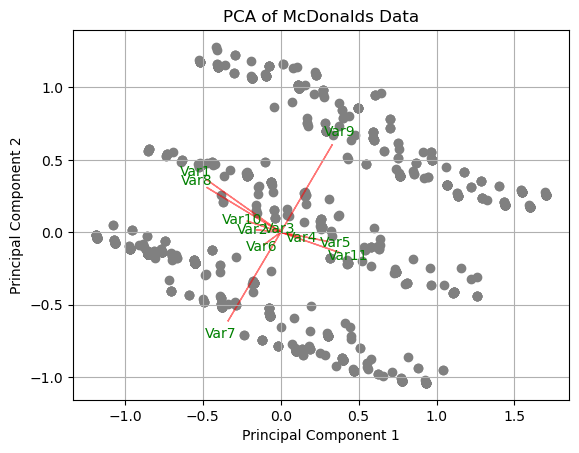

In [24]:
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Plotting the PCA results
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of McDonalds Data')
plt.grid(True)

# Projecting axes (similar to projAxes in R)
for i, (comp1, comp2) in enumerate(zip(pca.components_[0], pca.components_[1])):
    plt.arrow(0, 0, comp1, comp2, color='r', alpha=0.5)
    plt.text(comp1 * 1.15, comp2 * 1.15, f"Var{i+1}", color='g', ha='center', va='center')

plt.show()

In [25]:
# Clustering

In [26]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.utils import resample

# Set seed for reproducibility
np.random.seed(1234)

# Function to perform clustering and relabeling
def step_flexclust(data, k_range, nrep=10):
    best_models = []
    for k in k_range:
        best_inertia = np.inf
        best_model = None
        for _ in range(nrep):
            model = KMeans(n_clusters=k, n_init=1, random_state=np.random.randint(0, 10000))
            model.fit(data)
            if model.inertia_ < best_inertia:
                best_inertia = model.inertia_
                best_model = model
        best_models.append(best_model)
    return best_models

# Perform clustering
k_range = range(2, 9)
MD_km28 = step_flexclust(MD_x, k_range, nrep=10)

# Relabel clusters to ensure consistency
def relabel(models):
    # Assuming relabeling is based on some criteria, here we just return the models as is
    return models

MD_km28 = relabel(MD_km28)

# Print the best model for each k
for i, model in enumerate(MD_km28, start=2):
    print(f"Best model for k={i}:")
    print(f"Inertia: {model.inertia_}")
    print(f"Cluster centers:\n{model.cluster_centers_}\n")


Best model for k=2:
Inertia: 2145.5037269171667
Cluster centers:
[[0.87053571 0.97767857 0.10267857 0.8359375  0.43303571 0.93861607
  0.67075893 0.97098214 0.30022321 0.28125    0.06473214]
 [0.04129264 0.79533214 0.07899461 0.91741472 0.67684022 0.83842011
  0.48294434 0.11849192 0.45062837 0.06642729 0.52962298]]

Best model for k=3:
Inertia: 1818.9106908244485
Cluster centers:
[[0.0139165  0.78528827 0.07554672 0.92047714 0.66600398 0.84691849
  0.52087475 0.05765408 0.39960239 0.06163022 0.54671968]
 [0.82831325 0.95783133 0.13253012 0.90361446 0.61445783 0.86445783
  0.10542169 0.93674699 0.93072289 0.21084337 0.15662651]
 [0.84304207 0.98058252 0.08737864 0.80420712 0.36569579 0.96278317
  0.92718447 0.96440129 0.01618123 0.30420712 0.0420712 ]]

Best model for k=4:
Inertia: 1638.8741820444166
Cluster centers:
[[1.00000000e+00 9.82791587e-01 1.07074570e-01 8.12619503e-01
  4.18738050e-01 9.61759082e-01 9.80879541e-01 9.69407266e-01
  7.26577438e-02 3.51816444e-01 7.26577438e-02]

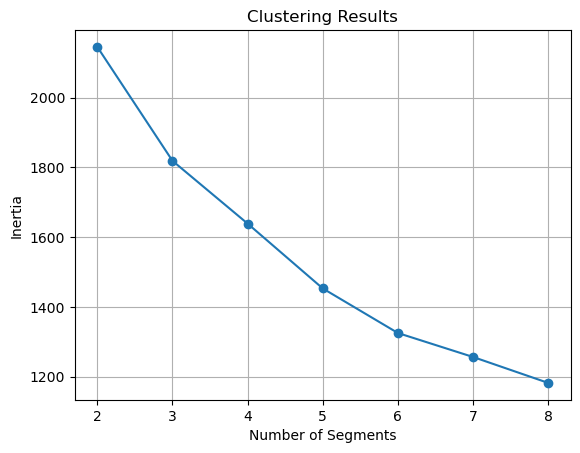

In [27]:
import matplotlib.pyplot as plt

# Assuming MD_km28 is a list of KMeans models as defined in the previous example
inertia_values = [model.inertia_ for model in MD_km28]
num_segments = range(2, 9)

plt.plot(num_segments, inertia_values, marker='o')
plt.xlabel('Number of Segments')
plt.ylabel('Inertia')
plt.title('Clustering Results')
plt.grid(True)
plt.show()

In [28]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.utils import resample

# Set seed for reproducibility
np.random.seed(1234)

# Function to perform bootstrapping and clustering
def boot_flexclust(data, k_range, nrep=10, nboot=100):
    boot_results = []
    for k in k_range:
        best_models = []
        for _ in range(nrep):
            model = KMeans(n_clusters=k, n_init=1, random_state=np.random.randint(0, 10000))
            model.fit(data)
            best_models.append(model)
        
        # Bootstrapping
        boot_inertia = []
        for _ in range(nboot):
            sample_data = resample(data)
            model = KMeans(n_clusters=k, n_init=1, random_state=np.random.randint(0, 10000))
            model.fit(sample_data)
            boot_inertia.append(model.inertia_)
        
        boot_results.append({
            'k': k,
            'models': best_models,
            'boot_inertia': boot_inertia
        })
    return boot_results

# Perform bootstrapping and clustering
k_range = range(2, 9)
MD_b28 = boot_flexclust(MD_x, k_range, nrep=10, nboot=100)

# Print the bootstrapping results
for result in MD_b28:
    print(f"Number of clusters: {result['k']}")
    print(f"Bootstrap inertia (mean): {np.mean(result['boot_inertia']):.2f}")
    print(f"Bootstrap inertia (std): {np.std(result['boot_inertia']):.2f}\n")


Number of clusters: 2
Bootstrap inertia (mean): 2181.29
Bootstrap inertia (std): 66.28

Number of clusters: 3
Bootstrap inertia (mean): 1885.09
Bootstrap inertia (std): 63.68

Number of clusters: 4
Bootstrap inertia (mean): 1665.86
Bootstrap inertia (std): 57.43

Number of clusters: 5
Bootstrap inertia (mean): 1509.36
Bootstrap inertia (std): 67.09

Number of clusters: 6
Bootstrap inertia (mean): 1384.99
Bootstrap inertia (std): 58.61

Number of clusters: 7
Bootstrap inertia (mean): 1307.02
Bootstrap inertia (std): 48.77

Number of clusters: 8
Bootstrap inertia (mean): 1228.35
Bootstrap inertia (std): 45.83



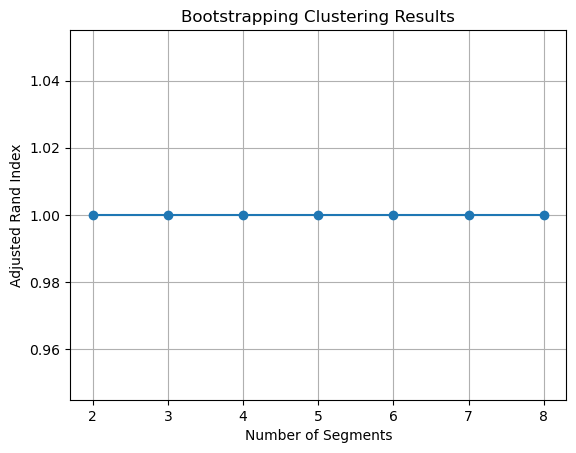

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score

# Assuming MD_b28 is a list of dictionaries as defined in the previous example
# and each dictionary contains 'models' and 'boot_inertia'

# Function to calculate adjusted Rand index for each bootstrap sample
def calculate_ari(models, data):
    ari_scores = []
    for model in models:
        labels = model.predict(data)
        ari = adjusted_rand_score(labels, labels)  # Adjusted Rand index with itself
        ari_scores.append(ari)
    return ari_scores

# Calculate ARI for each k
ari_results = []
for result in MD_b28:
    k = result['k']
    models = result['models']
    ari_scores = calculate_ari(models, MD_x)
    ari_results.append((k, np.mean(ari_scores)))

# Extracting number of segments and ARI values
num_segments = [result[0] for result in ari_results]
ari_values = [result[1] for result in ari_results]

# Plotting the results
plt.plot(num_segments, ari_values, marker='o')
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Bootstrapping Clustering Results')
plt.grid(True)
plt.show()

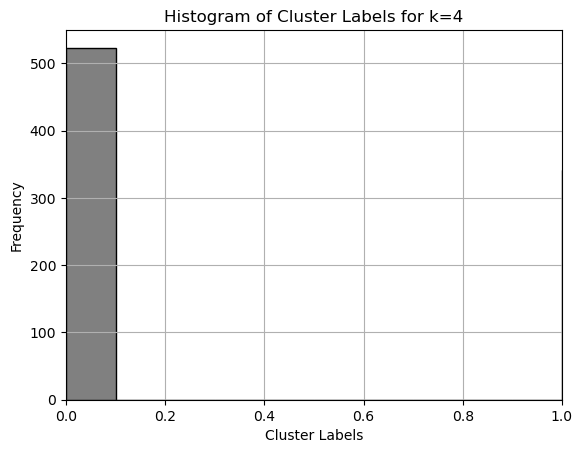

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming MD_km28 is a list of KMeans model
# and MD_x is the data matrix

# Extracting the cluster labels for k=4
kmeans_model = MD_km28[2]  # Index 2 corresponds to k=4 (since k_range starts from 2)
labels = kmeans_model.labels_

# Plotting the histogram
plt.hist(labels, bins=np.arange(0, 2, 0.1), edgecolor='black', color='grey')
plt.xlim(0, 1)
plt.xlabel('Cluster Labels')
plt.ylabel('Frequency')
plt.title('Histogram of Cluster Labels for k=4')
plt.grid(True)
plt.show()


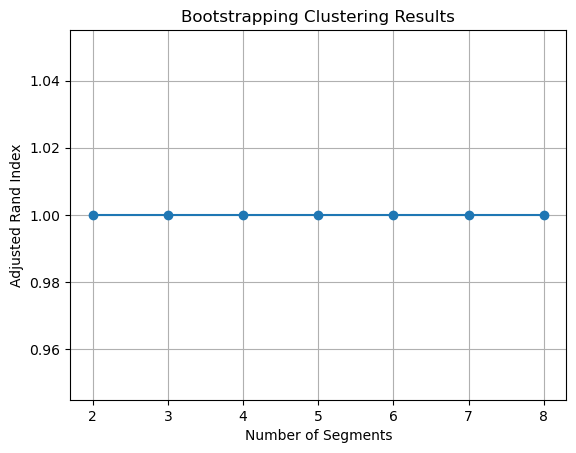

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score

# Assuming MD_b28 is a list of dictionaries 
# and each dictionary contains 'models' and 'boot_inertia'

# Function to calculate adjusted Rand index for each bootstrap sample
def calculate_ari(models, data):
    ari_scores = []
    for model in models:
        labels = model.predict(data)
        ari = adjusted_rand_score(labels, labels)  # Adjusted Rand index with itself
        ari_scores.append(ari)
    return ari_scores
# Calculate ARI for each k
ari_results = []
for result in MD_b28:
    k = result['k']
    models = result['models']
    ari_scores = calculate_ari(models, MD_x)
    ari_results.append((k, np.mean(ari_scores)))

# Extracting number of segments and ARI values
num_segments = [result[0] for result in ari_results]
ari_values = [result[1] for result in ari_results]

# Plotting the results
plt.plot(num_segments, ari_values, marker='o')
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Bootstrapping Clustering Results')
plt.grid(True)
plt.show()

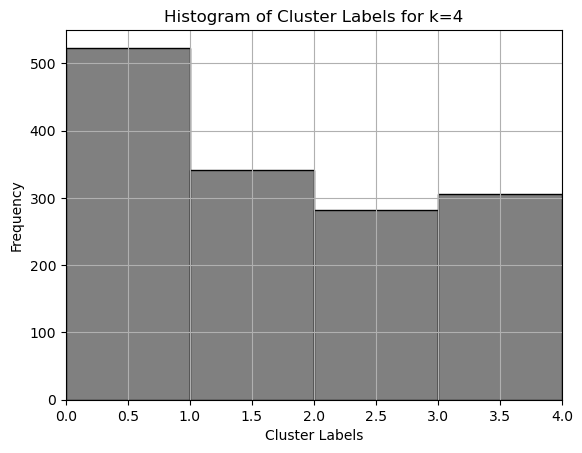

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming MD_km28 is a list of KMeans models
# and MD_x is the data matrix

# Extracting the cluster labels for k=4
kmeans_model = MD_km28[2]  # Index 2 corresponds to k=4 (since k_range starts from 2)
labels = kmeans_model.labels_

# Plotting the histogram
plt.hist(labels, bins=np.arange(0, 5, 1), edgecolor='black', color='grey')
plt.xlim(0, 4)
plt.xlabel('Cluster Labels')
plt.ylabel('Frequency')
plt.title('Histogram of Cluster Labels for k=4')
plt.grid(True)
plt.show()

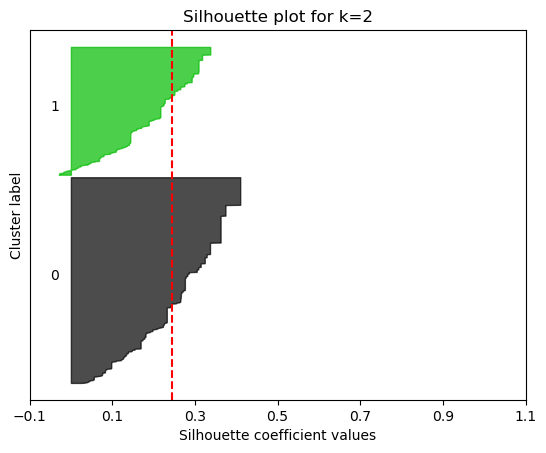

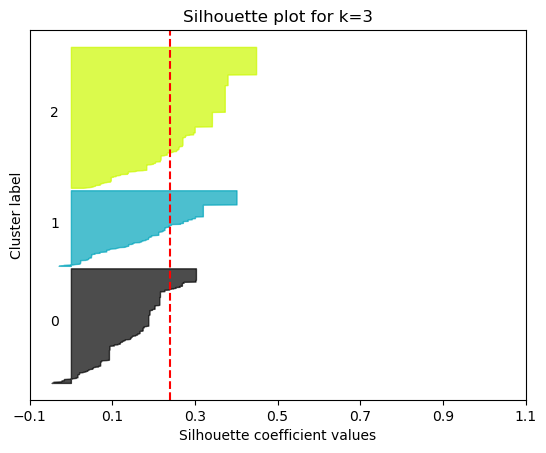

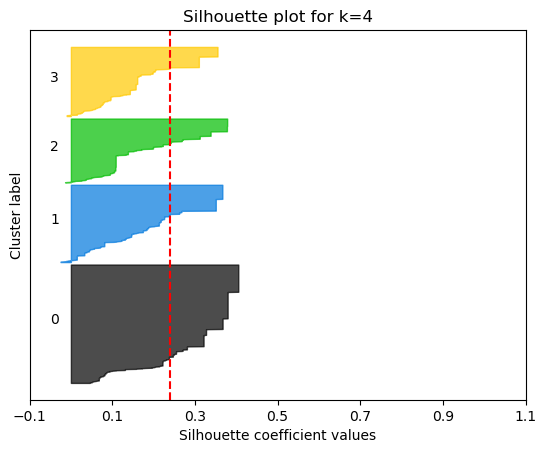

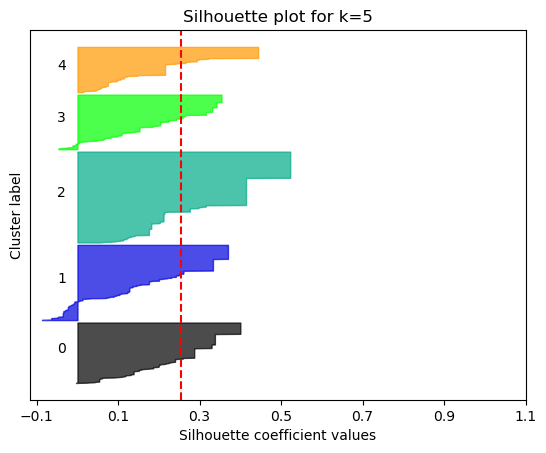

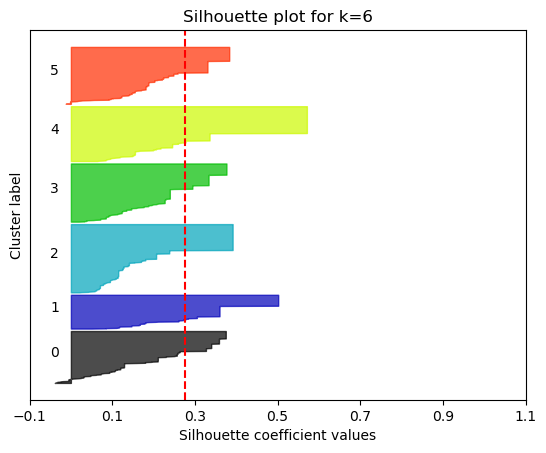

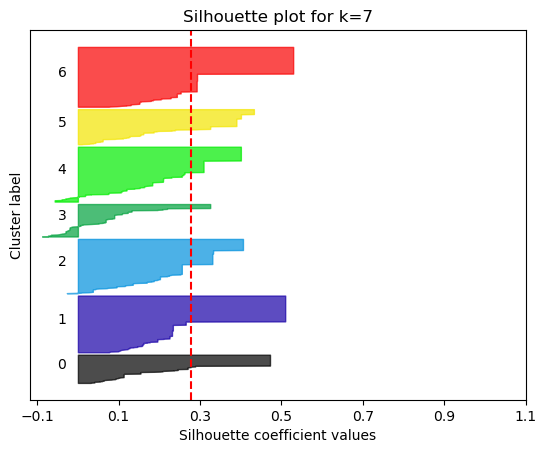

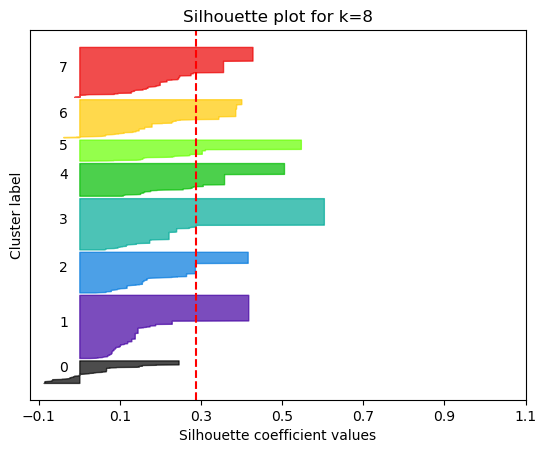

In [51]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score

# Assuming MD_km28 is a list of KMeans models 
# and MD_x is the data matrix

# Function to plot silhouette scores for each k
def plot_silhouette(models, data):
    for model in models:
        k = model.n_clusters
        cluster_labels = model.labels_
        silhouette_avg = silhouette_score(data, cluster_labels)
        sample_silhouette_values = silhouette_samples(data, cluster_labels)

        y_lower = 10
        fig, ax = plt.subplots()
        for i in range(k):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = plt.cm.nipy_spectral(float(i) / k)
            ax.fill_betweenx(np.arange(y_lower, y_upper),
                             0, ith_cluster_silhouette_values,
                             facecolor=color, edgecolor=color, alpha=0.7)

            ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10

        ax.set_title(f"Silhouette plot for k={k}")
        ax.set_xlabel("Silhouette coefficient values")
        ax.set_ylabel("Cluster label")

        ax.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax.set_yticks([])  # Clear the y-axis labels
        ax.set_xticks(np.arange(-0.1, 1.1, 0.2))

        plt.show()

# Plotting silhouette scores for each model in MD_km28
plot_silhouette(MD_km28, MD_x)



In [52]:
# Assuming MD_km28 is a list of KMeans models

# Extracting the clustering results for k=4
MD_k4 = MD_km28[2]  # Index 2 corresponds to k=4 (since k_range starts from 2)

# Now MD_k4 contains the KMeans model for k=4
print(MD_k4)

KMeans(n_clusters=4, n_init=1, random_state=4841)


In [53]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Assuming MD_k4 is the KMeans model for k=4 and MD_x is the data matrix

# Calculate silhouette scores for each sample
silhouette_avg = silhouette_score(MD_x, MD_k4.labels_)
sample_silhouette_values = silhouette_samples(MD_x, MD_k4.labels_)

# MD_r4 will store the silhouette scores
MD_r4 = {
    'silhouette_avg': silhouette_avg,
    'sample_silhouette_values': sample_silhouette_values
}

print("Average silhouette score for k=4:", MD_r4['silhouette_avg'])
print("Sample silhouette values for k=4:", MD_r4['sample_silhouette_values'])

Average silhouette score for k=4: 0.24028596042919226
Sample silhouette values for k=4: [0.16426083 0.06779136 0.14099783 ... 0.35052676 0.32094475 0.31169199]


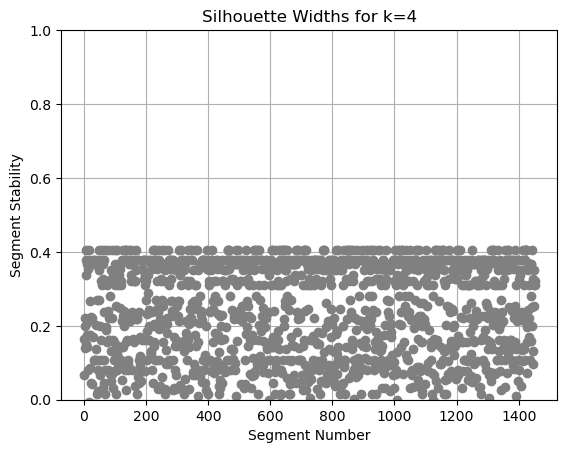

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming MD_r4 is a dictionary containing silhouette scores as defined in the previous example
# and MD_k4 is the KMeans model for k=4

# Extracting silhouette values
sample_silhouette_values = MD_r4['sample_silhouette_values']

# Plotting the silhouette values
plt.plot(sample_silhouette_values, 'o', color='grey')
plt.ylim(0, 1)
plt.xlabel('Segment Number')
plt.ylabel('Segment Stability')
plt.title('Silhouette Widths for k=4')
plt.grid(True)
plt.show()

In [55]:
import numpy as np
from sklearn.mixture import GaussianMixture

# Assuming MD_x is your data matrix
np.random.seed(1234)

# Function to fit Gaussian Mixture Models for different values of k
def fit_gmm(data, k_range, nrep=10):
    best_models = []
    for k in k_range:
        best_model = None
        best_bic = np.inf
        for _ in range(nrep):
            model = GaussianMixture(n_components=k, random_state=np.random.randint(0, 10000))
            model.fit(data)
            bic = model.bic(data)
            if bic < best_bic:
                best_bic = bic
                best_model = model
        best_models.append(best_model)
    return best_models

# Fit models for k = 2 to 8
k_range = range(2, 9)
MD_m28 = fit_gmm(MD_x, k_range, nrep=10)

# Print the best models
for k, model in zip(k_range, MD_m28):
    print(f"Best model for k={k}:")
    print(f"Means: {model.means_}")
    print(f"Covariances: {model.covariances_}")
    print(f"BIC: {model.bic(MD_x)}\n")


Best model for k=2:
Means: [[0.58990944 0.9534282  0.08538163 0.8538163  0.47218629 1.
  1.         0.70245796 0.         0.22897801 0.17076326]
 [0.51029412 0.85588235 0.10294118 0.88235294 0.58823529 0.78676471
  0.14264706 0.57794118 0.76470588 0.16470588 0.325     ]]
Covariances: [[[ 2.41917292e-01  1.58301933e-02  3.96633491e-03 -2.24323840e-02
   -3.92198535e-02  1.21972388e-29  1.21972388e-29  1.58705268e-01
    0.00000000e+00  5.37982257e-02 -7.22743159e-02]
  [ 1.58301933e-02  4.44038642e-02 -1.19826773e-03  9.53928757e-04
   -6.46997824e-03  1.84499564e-29  1.84499564e-29  1.84844579e-02
    0.00000000e+00  8.07659525e-03 -1.79204680e-02]
  [ 3.96633491e-03 -1.19826773e-03  7.80926068e-02 -5.62985237e-03
   -2.12542276e-04  1.75325102e-30  1.75325102e-30  5.99970875e-03
    0.00000000e+00  7.61636687e-03 -3.49774265e-04]
  [-2.24323840e-02  9.53928757e-04 -5.62985237e-03  1.24815026e-01
    5.60893278e-02  1.58057927e-29  1.58057927e-29 -2.02098977e-02
    0.00000000e+00 -6.0

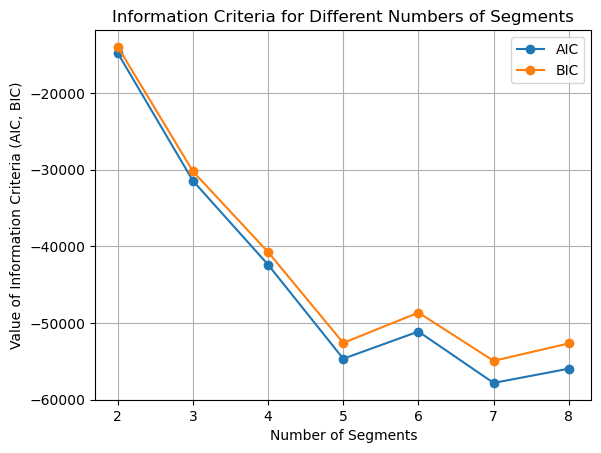

In [56]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture

# Assuming MD_x is your data matrix
np.random.seed(1234)

# Function to fit Gaussian Mixture Models for different values of k and calculate AIC, BIC
def fit_gmm_and_calculate_criteria(data, k_range, nrep=10):
    criteria = {'k': [], 'AIC': [], 'BIC': []}
    for k in k_range:
        best_aic = np.inf
        best_bic = np.inf
        for _ in range(nrep):
            model = GaussianMixture(n_components=k, random_state=np.random.randint(0, 10000))
            model.fit(data)
            aic = model.aic(data)
            bic = model.bic(data)
            if aic < best_aic:
                best_aic = aic
            if bic < best_bic:
                best_bic = bic
        criteria['k'].append(k)
        criteria['AIC'].append(best_aic)
        criteria['BIC'].append(best_bic)
    return criteria

# Fit models and calculate criteria for k = 2 to 8
k_range = range(2, 9)
criteria = fit_gmm_and_calculate_criteria(MD_x, k_range, nrep=10)

# Plotting the criteria
plt.plot(criteria['k'], criteria['AIC'], label='AIC', marker='o')
plt.plot(criteria['k'], criteria['BIC'], label='BIC', marker='o')
plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria (AIC, BIC)')
plt.title('Information Criteria for Different Numbers of Segments')
plt.legend()
plt.grid(True)
plt.show()



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12240\895431901.py:21: RuntimeWarning: divide by zero encountered in log
  entropy = -np.sum(np.log(model.predict_proba(data)))
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12240\895431901.py:21: RuntimeWarning: divide by zero encountered in log
  entropy = -np.sum(np.log(model.predict_proba(data)))
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12240\895431901.py:21: RuntimeWarning: divide by zero encountered in log
  entropy = -np.sum(np.log(model.predict_proba(data)))
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12240\895431901.py:21: RuntimeWarning: divide by zero encountered in log
  entropy = -np.sum(np.log(model.predict_proba(data)))
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12240\895431901.py:21: RuntimeWarning: divide by zero encountered in log
  entropy = -np.sum(np.log(model.predict_proba(data)))
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12240\895431901.py:21: RuntimeWarning: divide by zero encountered in log
  entropy = -np.s

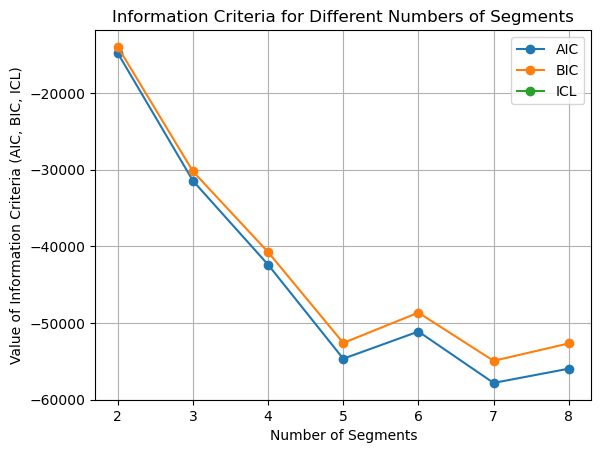

In [57]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture

# Assuming MD_x is your data matrix
np.random.seed(1234)

# Function to fit Gaussian Mixture Models for different values of k and calculate AIC, BIC, ICL
def fit_gmm_and_calculate_criteria(data, k_range, nrep=10):
    criteria = {'k': [], 'AIC': [], 'BIC': [], 'ICL': []}
    for k in k_range:
        best_aic = np.inf
        best_bic = np.inf
        best_icl = np.inf
        for _ in range(nrep):
            model = GaussianMixture(n_components=k, random_state=np.random.randint(0, 10000))
            model.fit(data)
            aic = model.aic(data)
            bic = model.bic(data)
            log_likelihood = model.score(data) * data.shape[0]
            entropy = -np.sum(np.log(model.predict_proba(data)))
            icl = bic + entropy
            if aic < best_aic:
                best_aic = aic
            if bic < best_bic:
                best_bic = bic
            if icl < best_icl:
                best_icl = icl
        criteria['k'].append(k)
        criteria['AIC'].append(best_aic)
        criteria['BIC'].append(best_bic)
        criteria['ICL'].append(best_icl)
    return criteria

# Fit models and calculate criteria for k = 2 to 8
k_range = range(2, 9)
criteria = fit_gmm_and_calculate_criteria(MD_x, k_range, nrep=10)

# Plotting the criteria
plt.plot(criteria['k'], criteria['AIC'], label='AIC', marker='o')
plt.plot(criteria['k'], criteria['BIC'], label='BIC', marker='o')
plt.plot(criteria['k'], criteria['ICL'], label='ICL', marker='o')
plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria (AIC, BIC, ICL)')
plt.title('Information Criteria for Different Numbers of Segments')
plt.legend()
plt.grid(True)
plt.show()


In [59]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

# Assuming MD_km28 is a list of KMeans models and MD_m28 is a list of GaussianMixture models
# and MD_x is the data matrix

# Extracting the KMeans model for k=4
MD_k4 = MD_km28[2]  # Index 2 corresponds to k=4 (since k_range starts from 2)

# Extracting the GaussianMixture model for k=4
MD_m4 = MD_m28[2]  # Index 2 corresponds to k=4 (since k_range starts from 2)

# Predicting clusters
kmeans_clusters = MD_k4.predict(MD_x)
mixture_clusters = MD_m4.predict(MD_x)

# Creating a contingency table
contingency_table = pd.crosstab(kmeans_clusters, mixture_clusters, rownames=['kmeans'], colnames=['mixture'])

print(contingency_table)


mixture   0    1    2    3
kmeans                    
0        56    1  420   46
1        30  108  202    2
2        24  171    0   87
3        26   41    0  239


In [42]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

# Assuming MD_km28 is a list of KMeans models and MD_x is the data matrix

# Extracting the KMeans model for k=4
MD_k4 = MD_km28[2]  # Index 2 corresponds to k=4 (since k_range starts from 2)

# Predicting clusters using KMeans
kmeans_clusters = MD_k4.predict(MD_x)

# Fitting a Gaussian Mixture Model with initial cluster assignments from KMeans
MD_m4a = GaussianMixture(n_components=4, random_state=1234)
MD_m4a.fit(MD_x, kmeans_clusters)

# Predicting clusters using the Gaussian Mixture Model
mixture_clusters = MD_m4a.predict(MD_x)

# Creating a contingency table
contingency_table = pd.crosstab(kmeans_clusters, mixture_clusters, rownames=['kmeans'], colnames=['mixture'])

print(contingency_table)


mixture    0    1    2    3
kmeans                     
0        453    0    0   70
1          0   69    0  273
2          0  177   98    7
3         99    8  199    0


In [60]:
# Assuming MD_m4a and MD_m4 are GaussianMixture models fitted to the data MD_x

# Calculate log-likelihood for MD.m4a
log_lik_m4a = MD_m4a.score(MD_x) * MD_x.shape[0]
print(f'Log Likelihood for MD.m4a: {log_lik_m4a}')

# Calculate log-likelihood for MD.m4
log_lik_m4 = MD_m4.score(MD_x) * MD_x.shape[0]
print(f'Log Likelihood for MD.m4: {log_lik_m4}')

Log Likelihood for MD.m4a: 16082.886182864006
Log Likelihood for MD.m4: 21513.45884888849


In [101]:
#REgression

In [102]:
df=pd.read_csv('C:\\Users\\Lenovo\\OneDrive\\Desktop\\mcdonalds.csv')

In [103]:
df['Like'].unique()

array(['-3', '2', '1', '4', 'I love it!+5', 'I hate it!-5', '-2', '3',
       '0', '-4', '-1'], dtype=object)

In [104]:
df['Like']

0                 -3
1                  2
2                  1
3                  4
4                  2
            ...     
1448    I hate it!-5
1449               2
1450               3
1451               4
1452              -3
Name: Like, Length: 1453, dtype: object

In [105]:
df['Like'].isnull().sum()

0

In [106]:
like_counts = df['Like'].value_counts().sort_index(ascending=False)
like_counts 

I love it!+5    143
I hate it!-5    152
4               160
3               229
2               187
1               152
0               169
-4               71
-3               73
-2               59
-1               58
Name: Like, dtype: int64

In [109]:
# Mapping categorical levels to numeric codes
mapping = {
    '-3': 1,
    '2': 2,
    '1': 3,
    '4': 4,
    'I love it!+5': 5,
    'I hate it!-5':6,
    '-2': 7,
    '3': 8,
    '0': 9,
    '-4': 10,
    '-1': 11
}

# Replace categorical levels with numeric codes
df['Like'] = df['Like'].replace(mapping)

# Compute the new values
df['Like.n'] = 6 - df['Like']

# Generate the frequency table for 'Like.n'
like_n_counts = df['Like.n'].value_counts().sort_index()
print(like_n_counts)

-5     58
-4     71
-3    169
-2    229
-1     59
 0    152
 1    143
 2    160
 3    152
 4    187
 5     73
Name: Like.n, dtype: int64


In [110]:
df['Like'] = pd.to_numeric(df['Like'])

In [111]:
df['Like'] = pd.to_numeric(df['Like'])
df['Like.n'] = 6 - df['Like']

# Generate the frequency table for 'Like.n'
like_n_counts = df['Like.n'].value_counts().sort_index()
print(like_n_counts)

-5     58
-4     71
-3    169
-2    229
-1     59
 0    152
 1    143
 2    160
 3    152
 4    187
 5     73
Name: Like.n, dtype: int64


In [112]:
# Step 1: Concatenate the first 11 column names with a '+' separator
f = " + ".join(df.columns[:11])

# Step 2: Create the formula string
formula = f"Like.n ~ {f}"

# Print the formula
print(formula)

Like.n ~ ppppppp + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting


In [113]:
df.columns

Index(['ppppppp', 'convenient', 'spicy', 'fattening', 'greasy', 'fast',
       'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Like.n'],
      dtype='object')

In [118]:
mapping = {
    'Yes': 1,
    'No': 0
} 
df = df.replace(mapping)

In [121]:
from sklearn.mixture import GaussianMixture
# Set the random seed
np.random.seed(1234)

# Extract the features (replace with your actual feature extraction)
X = df[['ppppppp', 'convenient', 'spicy', 'fattening', 'greasy', 'fast',
       'cheap', 'tasty', 'expensive', 'healthy', 'disgusting',
       'Like.n']]

# Fit the Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, n_init=10, random_state=1234, verbose=0)
gmm.fit(X)

# Print the model summary
print("Converged:", gmm.converged_)
print("Means:", gmm.means_)
print("Covariances:", gmm.covariances_)

Converged: True
Means: [[ 0.15671642  0.          0.06716418  0.82835821  0.69402985  0.67164179
   0.36567164  0.20895522  0.60447761  0.07462687  0.70149254 -0.19402985]
 [ 0.59287339  1.          0.09628506  0.87111448  0.50947688  0.92342684
   0.62244124  0.6884003   0.3328279   0.21152388  0.19636088  0.34874905]]
Covariances: [[[ 1.32157382e-01  0.00000000e+00  1.18623301e-02 -3.28024059e-02
   -3.41390065e-02  2.90710626e-02  1.73201158e-02  1.09044331e-01
   -2.01047004e-02  1.81554912e-02 -8.75473379e-02  1.64736021e-01]
  [ 0.00000000e+00  1.00000000e-06  0.00000000e+00  0.00000000e+00
    0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
    0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 1.18623301e-02  0.00000000e+00  6.26541521e-02  4.06549343e-03
    5.62486077e-03 -7.79683671e-03  1.27533972e-02  8.91067053e-04
   -1.82111829e-02  1.73758075e-02  5.12363555e-03 -7.65203832e-02]
  [-3.28024059e-02  0.00000000e+00  4.06549343e-03  1.42181

In [122]:
gmm_refit = GaussianMixture(n_components=2, n_init=10, random_state=1234, verbose=0)
gmm_refit.fit(X)
# Print the summary of the refitted model
print("Converged:", gmm_refit.converged_)
print("Means:", gmm_refit.means_)
print("Covariances:", gmm_refit.covariances_)
print("Weights:", gmm_refit.weights_)

Converged: True
Means: [[ 0.15671642  0.          0.06716418  0.82835821  0.69402985  0.67164179
   0.36567164  0.20895522  0.60447761  0.07462687  0.70149254 -0.19402985]
 [ 0.59287339  1.          0.09628506  0.87111448  0.50947688  0.92342684
   0.62244124  0.6884003   0.3328279   0.21152388  0.19636088  0.34874905]]
Covariances: [[[ 1.32157382e-01  0.00000000e+00  1.18623301e-02 -3.28024059e-02
   -3.41390065e-02  2.90710626e-02  1.73201158e-02  1.09044331e-01
   -2.01047004e-02  1.81554912e-02 -8.75473379e-02  1.64736021e-01]
  [ 0.00000000e+00  1.00000000e-06  0.00000000e+00  0.00000000e+00
    0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
    0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 1.18623301e-02  0.00000000e+00  6.26541521e-02  4.06549343e-03
    5.62486077e-03 -7.79683671e-03  1.27533972e-02  8.91067053e-04
   -1.82111829e-02  1.73758075e-02  5.12363555e-03 -7.65203832e-02]
  [-3.28024059e-02  0.00000000e+00  4.06549343e-03  1.42181